#  Project Title:
## Marketing Campaign for Banking Products

### Data Description:
The file Bank.xls contains data on 5000 customers. The data include customer
demographic information (age, income, etc.), the customer's relationship with the bank
(mortgage, securities account, etc.), and the customer response to the last personal
loan campaign (Personal Loan).
Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was
offered to them in the earlier campaign.


### Data: https://www.kaggle.com/itsmesunil/bank-loan-modelling/download


### Context:
The bank has a growing customer base. The bank wants to increase borrowers (asset
customers) base to bring in more loan business and earn more through the interest on
loans. So , the bank wants to convert the liability based customers to personal loan
customers. (while retaining them as depositors). A campaign that the bank ran last year
for liability customers showed a healthy conversion rate of over 9% success. The
department wants you to build a model that will help them identify the potential
customers who have a higher probability of purchasing the loan. This will increase the
success ratio while at the same time reduce the cost of the campaign.


### Attribute Information:
● ID: Customer ID

● Age: Customer's age in completed years

● Experience: #years of professional experience

● Income: Annual income of the customer ($000)

● ZIP Code: Home Address ZIP code.

● Family: Family size of the customer

● CCAvg: Avg. spending on credit cards per month ($000)

● Education: Education Level. 1: Undergrad; 2: Graduate; 3:
Advanced/Professional

● Mortgage: Value of house mortgage if any. ($000)

● Personal Loan: Did this customer accept the personal loan offered in the last
campaign?

● Securities Account: Does the customer have a securities account with the bank?

● CD Account: Does the customer have a certificate of deposit (CD) account with
the bank?

● Online: Does the customer use internet banking facilities?

● Credit card: Does the customer use a credit card issued by the bank?

### Objective:
The classification goal is to predict the likelihood of a liability customer buying personal
loans.


### Steps and tasks:

 ### 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values etc

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [2]:
#importing dataset 
df=pd.read_csv("C:\\Users\\manisha\\Desktop\\Internship_studio ML\\dataset\\Bank_Personal_Loan_Modelling - Data.csv") 

In [3]:
#printing 5 data from starts of dataset
df.head() 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
# to get the datatype of each column and non null rows from each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
# To display summary stats such as count ,mean std dev ,min ,max
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [6]:
# To display no of null values present in each column of dataset
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

### 2. Check if you need to clean the data for any of the variables


!!!Yes,there is need to clean data because as you can see here experience column has negative value and experience can not be negative (faulty data ) so dropping experience column and correlating it with age and also here is ID column as well which is not required because it is randomly generated  number since in machine learning model,signal should be separated fron noices so dropping ID column!!!

In [7]:
experience=df['Experience']
age=df['Age']
correlation=experience.corr(age) #for calculating the correlation between experience an
print(correlation)

0.9942148569683316


In [8]:
df=df.drop(['ID','Experience'],axis=1) #cleaning dataset by deleting unnecessary data

In [9]:
df.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


### 3. EDA: Study the data distribution in each attribute and target variable, share your findings.








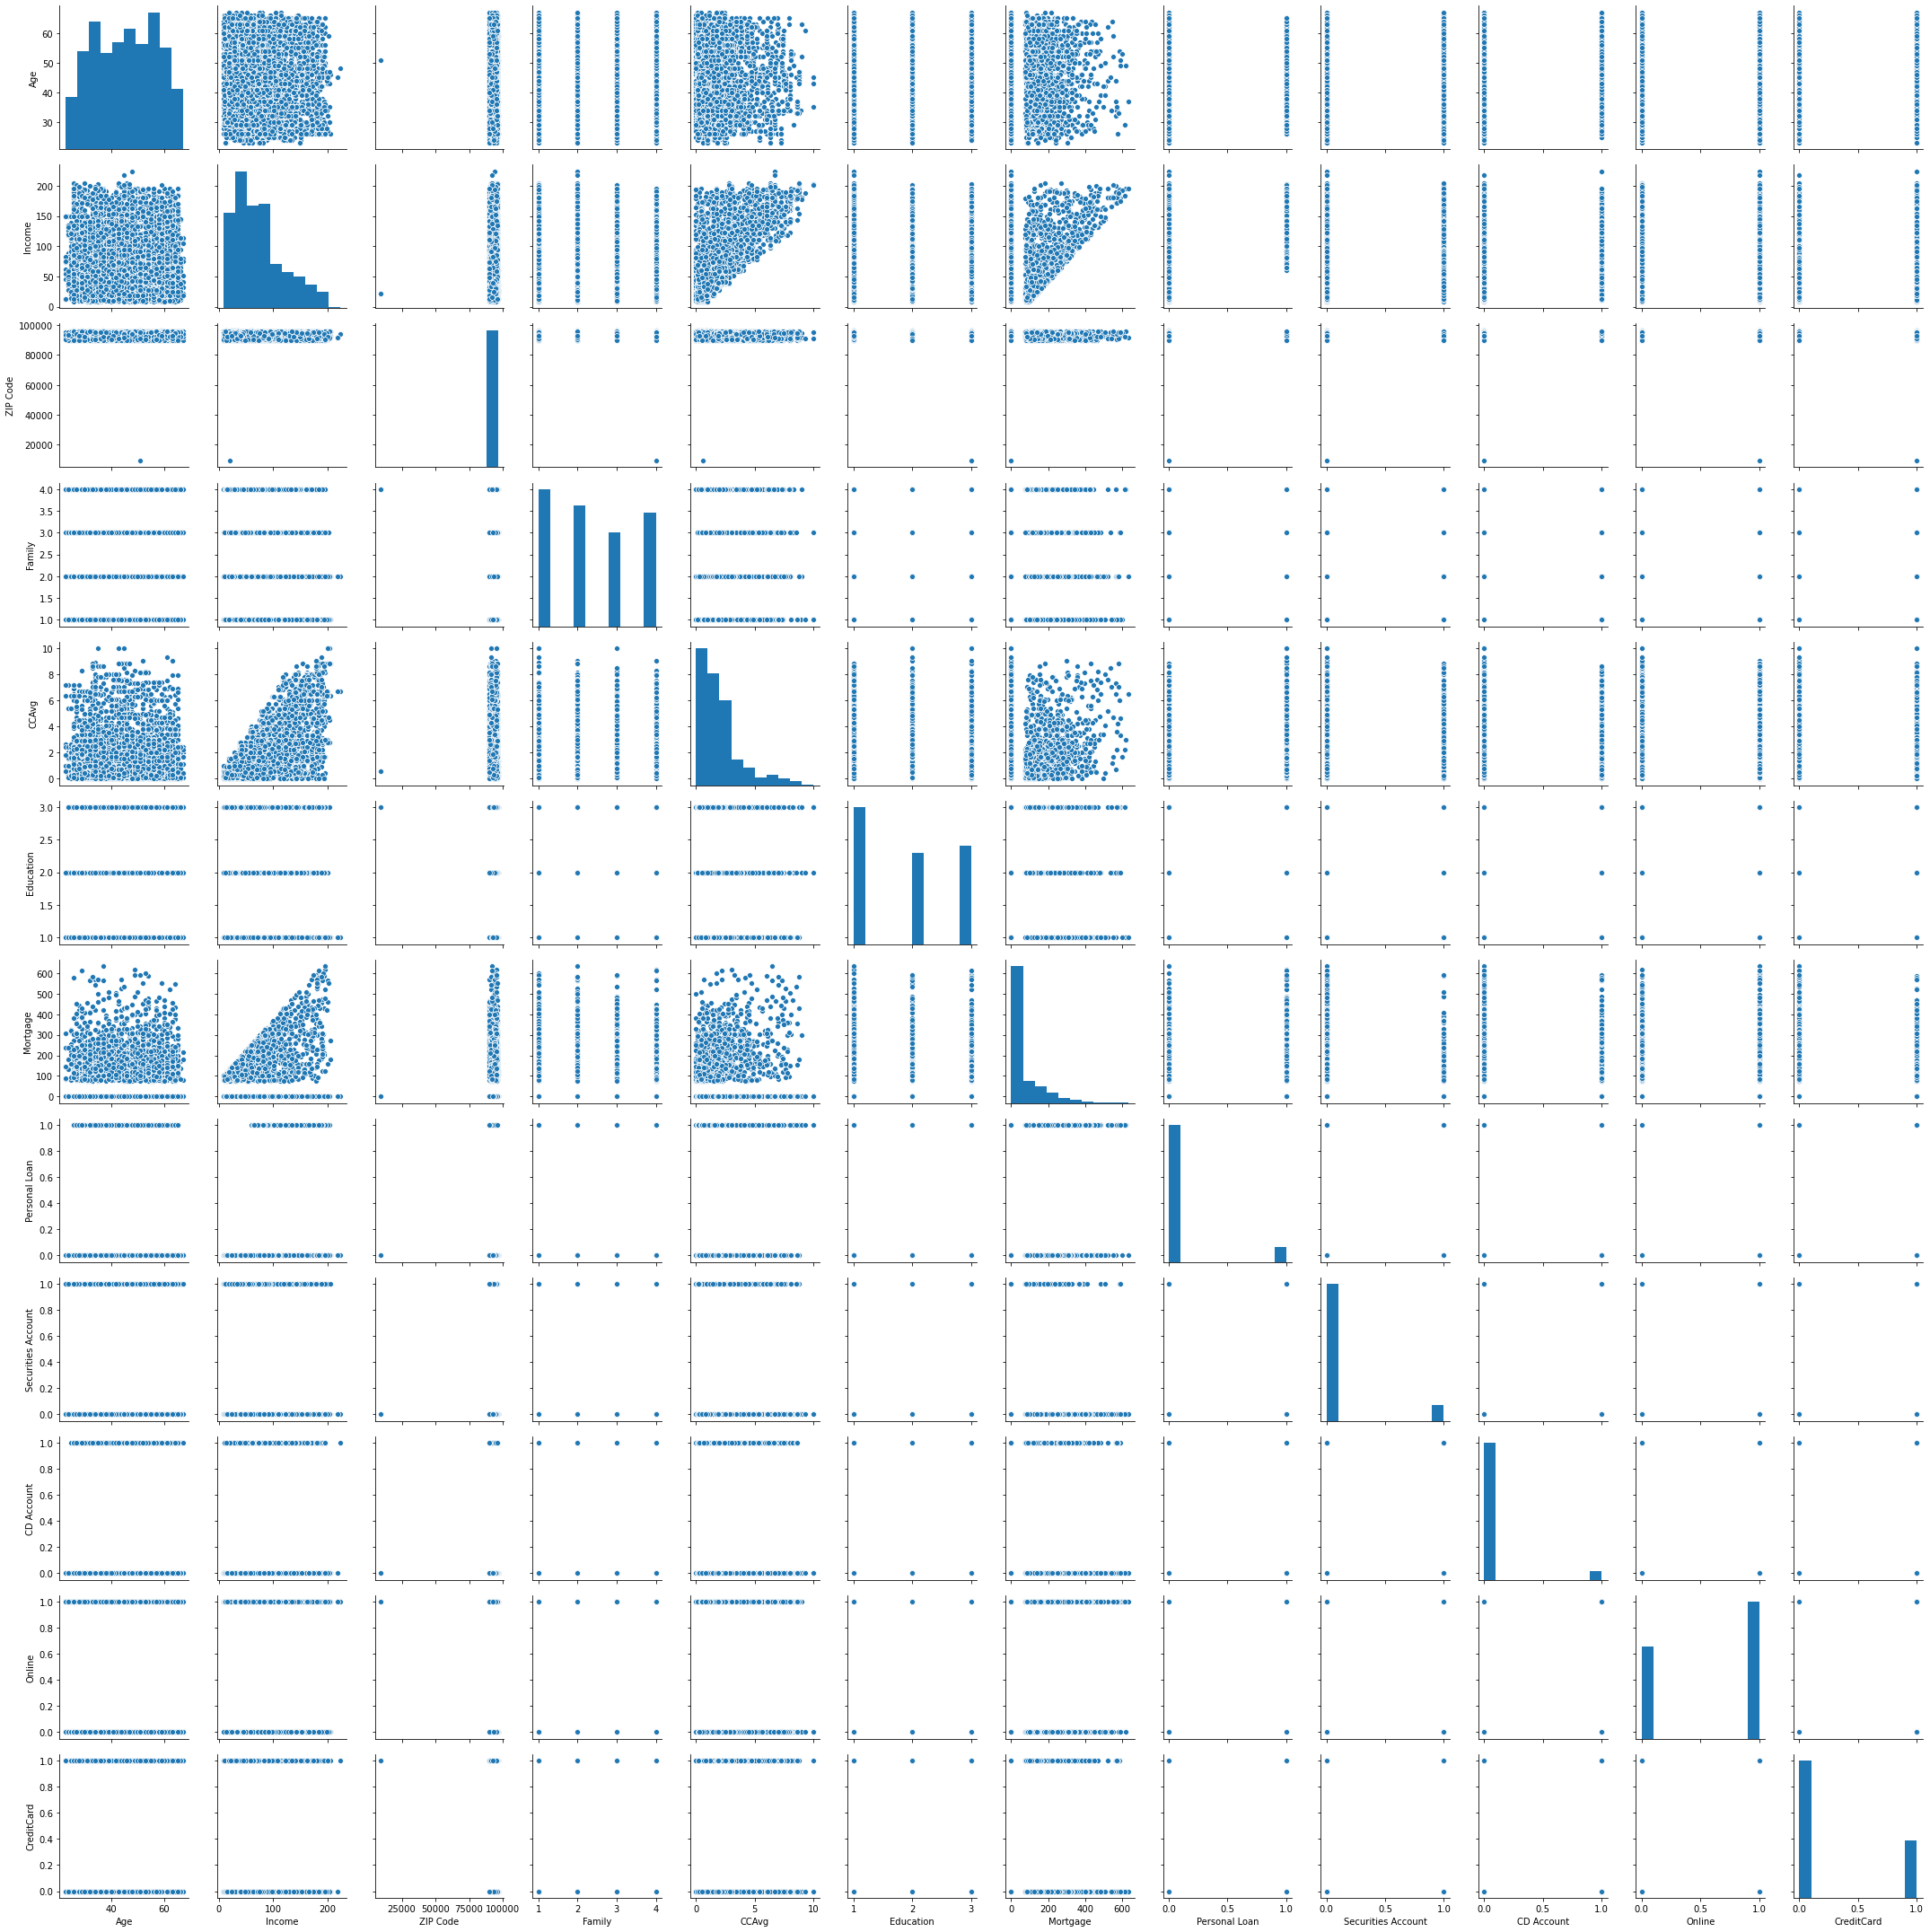

In [10]:
sb.pairplot(df)
plt.tight_layout()

#### ● Number of unique in each column?


In [11]:
df.nunique()

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [12]:
df=df.drop('ZIP Code',axis=1)
df.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


#### ● Number of people with zero mortgage?


In [13]:
(df.Mortgage==0).sum()

3462

#### ● Number of people with zero credit card spending per month?

In [14]:
(df.CCAvg==0).sum()

106

#### ● Value counts of all categorical columns.

In [15]:
df['Family'].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [16]:
df['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [17]:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [18]:
df['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [19]:
df['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [20]:
df['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [21]:
df['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

#### ● Univariate 

In [22]:
sb.set_style(style='white')

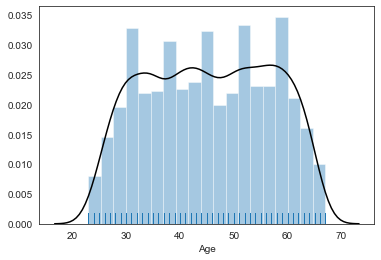

In [23]:
sb.distplot(df.Age,rug=True,kde_kws={"color": "k"},vertical=False)

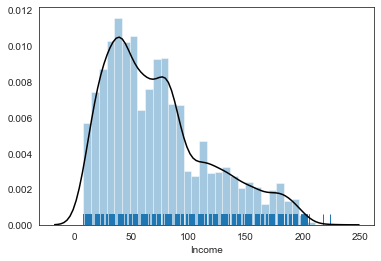

In [24]:
sb.distplot(df.Income,rug=True,kde_kws={"color": "k"},vertical=False)

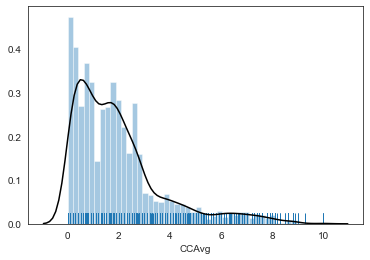

In [25]:
sb.distplot(df.CCAvg,rug=True,kde_kws={"color": "k"},vertical=False)

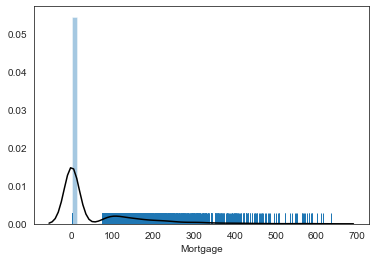

In [26]:
sb.distplot(df.Mortgage,rug=True,kde_kws={"color": "k"},vertical=False)

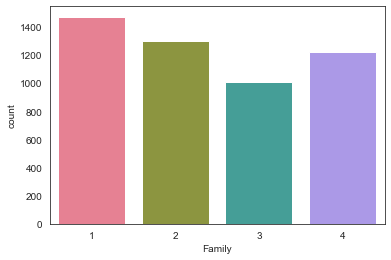

In [27]:
sb.countplot(df.Family,palette="husl")

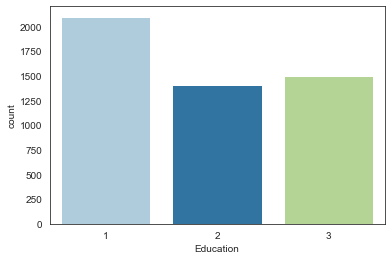

In [28]:
sb.countplot(df.Education,palette="Paired")

#### ● Bivariate analysis

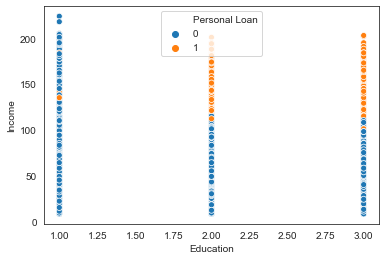

In [29]:
sb.scatterplot(x='Education',y='Income',hue='Personal Loan',data=df)

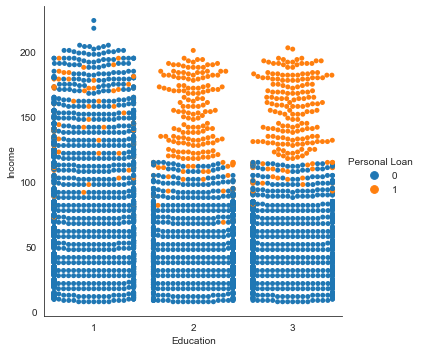

In [30]:
sb.catplot(x='Education', y='Income', hue='Personal Loan', data = df, kind='swarm')

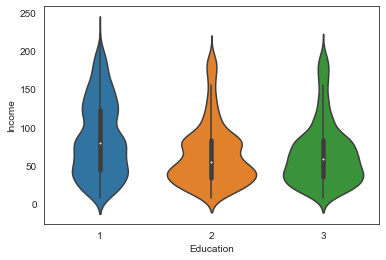

In [31]:
sb.violinplot(x='Education',y='Income',data=df,pallete='rainbow')

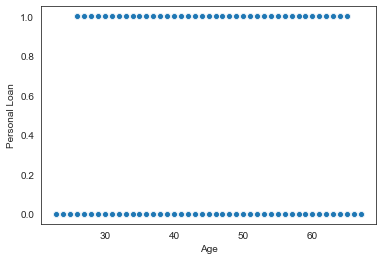

In [32]:
sb.scatterplot(x='Age',y='Personal Loan',data=df)

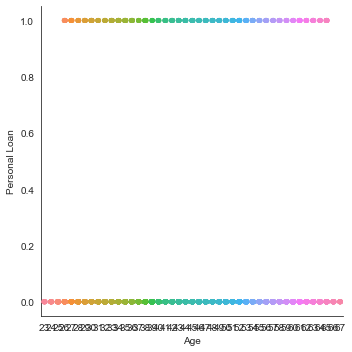

In [33]:
sb.catplot(x='Age',y='Personal Loan',data=df)

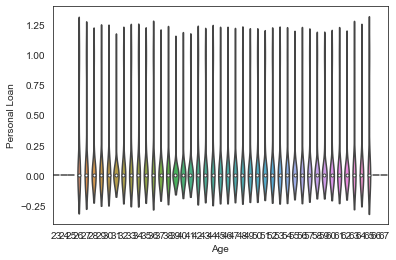

In [34]:
sb.violinplot(x='Age',y='Personal Loan',data=df,pallete='rainbow')

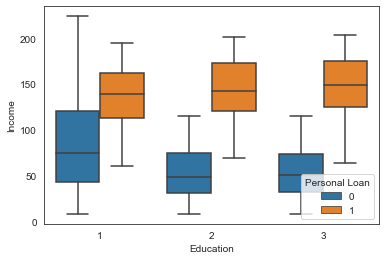

In [35]:
sb.boxplot(x='Education',y='Income',hue='Personal Loan',data=df)

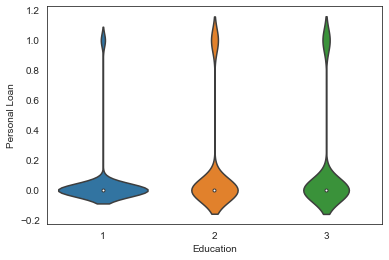

In [36]:
sb.violinplot(x='Education',y='Personal Loan',data=df,pallete='rainbow')

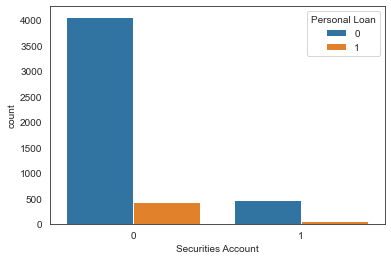

In [37]:
#majority of people having Security account don't have personal loan
sb.countplot(x='Securities Account',hue='Personal Loan',data=df)

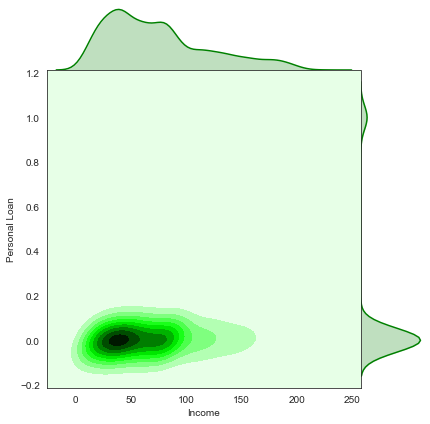

In [38]:
sb.jointplot('Income','Personal Loan',data=df, kind="kde", space=0, color="g")

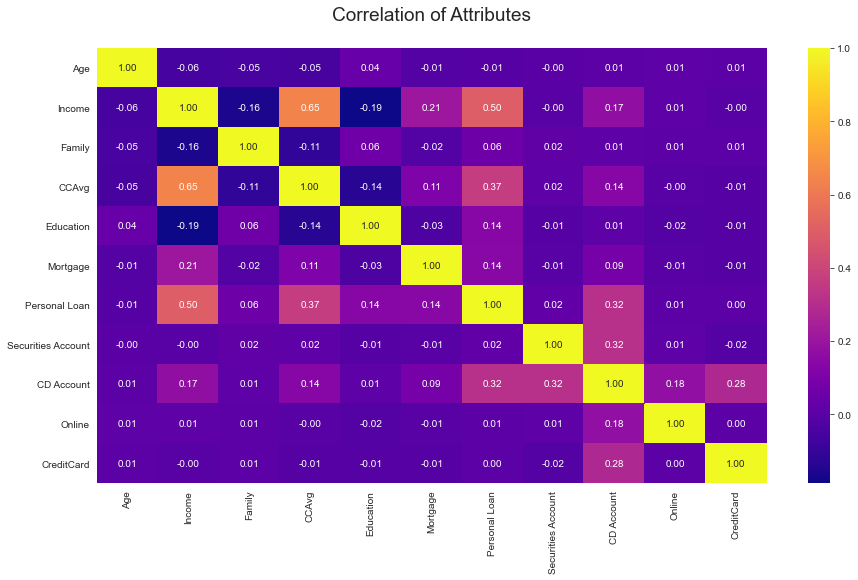

In [39]:
plt.figure(figsize = (15,8))
plt.title('Correlation of Attributes', y=1.05, size=19)
sb.heatmap(df.corr(),cmap='plasma',annot=True,fmt='.2f')

### 4. Apply necessary transformations for the feature variables


In [40]:
datax=df.loc[:,df.columns!="Personal Loan"]
datay=df['Personal Loan']

In [41]:
datax.shape,datay.shape

((5000, 10), (5000,))

In [42]:
datax.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,1,0,0,0
1,45,34,3,1.5,1,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,1


In [43]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(datax['Income'].values.reshape(-1,1))
t=pt.transform(datax['Income'].values.reshape(-1,1))

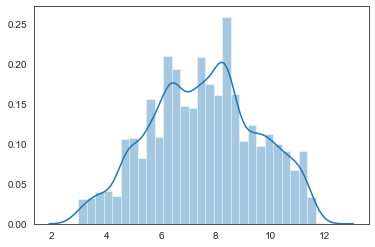

In [44]:
sb.distplot(t)

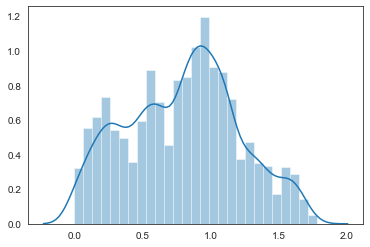

In [45]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(datax['CCAvg'].values.reshape(-1,1))
t=pt.transform(datax['CCAvg'].values.reshape(-1,1))
sb.distplot(t)

In [46]:
df.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


In [47]:
datax['Mortgage_1'] = pd.cut(datax.Mortgage,
                               bins=[0,100,200,300,400,500,600,700],
                               labels=[0,1,2,3,4,5,6],
                               include_lowest=True)
datax.drop('Mortgage', axis=1, inplace=True)

In [48]:
datax.head()

,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_1
0,25,49,4,1.6,1,1,0,0,0,0
1,45,34,3,1.5,1,1,0,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,1,0


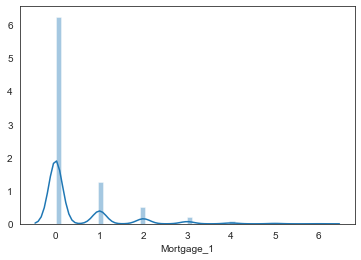

In [49]:
sb.distplot(datax.Mortgage_1)

### 5. Normalise your data and split the data into training and test set in the ratio of 70:30 respectively

In [50]:
from sklearn import preprocessing
x=df[['Age']].values.astype(float)
min_max_scaler=preprocessing.MinMaxScaler()
x_scaled=min_max_scaler.fit_transform(x)
df_normalized=pd.DataFrame(x_scaled)
print(df_normalized.head())

          0
0  0.045455
1  0.500000
2  0.363636
3  0.272727
4  0.272727


In [51]:
from sklearn import preprocessing
x=df[['Income']].values.astype(float)
min_max_scaler=preprocessing.MinMaxScaler()
x_scaled=min_max_scaler.fit_transform(x)
fd_normalized=pd.DataFrame(x_scaled)
print(fd_normalized.head())

          0
0  0.189815
1  0.120370
2  0.013889
3  0.425926
4  0.171296


In [52]:
from sklearn import preprocessing
x=df[['CCAvg']].values.astype(float)
min_max_scaler=preprocessing.MinMaxScaler()
x_scaled=min_max_scaler.fit_transform(x)
gd_normalized=pd.DataFrame(x_scaled)
print(gd_normalized.head())

      0
0  0.16
1  0.15
2  0.10
3  0.27
4  0.10


In [53]:
from sklearn import preprocessing
x=df[['Mortgage']].values.astype(float)
min_max_scaler=preprocessing.MinMaxScaler()
x_scaled=min_max_scaler.fit_transform(x)
dg_normalized=pd.DataFrame(x_scaled)
print(dg_normalized.head())

     0
0  0.0
1  0.0
2  0.0
3  0.0
4  0.0


In [54]:
b = df[['Mortgage']].values.astype(float)
# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()
# Create an object to transform the data to fit minmax processor
b_scaled = min_max_scaler.fit_transform(b)
# Run the normalizer on the dataframe
dff_normalized = pd.DataFrame(b_scaled)
# View the dataframe
print(dff_normalized.head())

     0
0  0.0
1  0.0
2  0.0
3  0.0
4  0.0


In [55]:
d=df_normalized
e=fd_normalized
l=gd_normalized
k=dg_normalized

In [56]:
f=dff_normalized

In [57]:
df1=pd.merge(d, e, left_index=True, right_index=True, how='outer')
df1.head()

,0_x,0_y
0,0.045455,0.189815
1,0.500000,0.120370
2,0.363636,0.013889
3,0.272727,0.425926
4,0.272727,0.171296


In [58]:
df2=pd.merge(l,k, left_index=True, right_index=True, how='outer')
df2.head()

,0_x,0_y
0,0.16,0.0
1,0.15,0.0
2,0.10,0.0
3,0.27,0.0
4,0.10,0.0


In [59]:
df3=pd.merge(df1,df2, left_index=True, right_index=True, how='outer')
df3.head()

,0_x_x,0_y_x,0_x_y,0_y_y
0,0.045455,0.189815,0.16,0.0
1,0.500000,0.120370,0.15,0.0
2,0.363636,0.013889,0.10,0.0
3,0.272727,0.425926,0.27,0.0
4,0.272727,0.171296,0.10,0.0


In [60]:
df4=pd.merge(df3,f, left_index=True, right_index=True, how='outer')
df4.head()

,0_x_x,0_y_x,0_x_y,0_y_y,0
0,0.045455,0.189815,0.16,0.0,0.0
1,0.500000,0.120370,0.15,0.0,0.0
2,0.363636,0.013889,0.10,0.0,0.0
3,0.272727,0.425926,0.27,0.0,0.0
4,0.272727,0.171296,0.10,0.0,0.0


#### Spliting data into 70:30

In [61]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(datax,datay,test_size=0.3,stratify=datay,random_state=0)

### 6. Use the Logistic Regression model to predict the likelihood of a customer buying personal loans.

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score,plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

In [63]:
x= LogisticRegression(C=1.0, max_iter=1000)
x.fit(train_x, train_y)

LogisticRegression(max_iter=1000)

In [64]:
class_name = ['will not take loan', 'take loan']

In [65]:
x_train_score = (x.score(train_x, train_y))*100
x_test_score = (x.score(test_x, test_y))*100
print('Training Accuracy:', x_train_score)
print('Testing Accuracy:', x_test_score)
y_pred_logi = x.predict(test_x)
precision_logi = precision_score(test_y, y_pred_logi, labels=class_name)
recall_logi = recall_score(test_y, y_pred_logi)
print('Precision:', precision_logi*100)
print('Recall:', recall_logi*100)

Training Accuracy: 95.22857142857143
Testing Accuracy: 94.93333333333334
Precision: 81.48148148148148
Recall: 61.111111111111114


### 7. Print all the metrics related for evaluating the model performance

Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

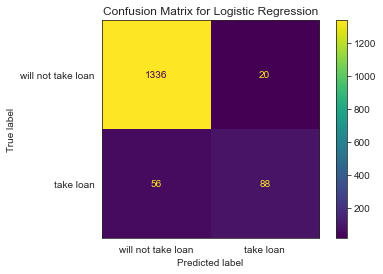

In [66]:
plot_confusion_matrix(x, test_x, test_y, display_labels=class_name,)
plt.title('Confusion Matrix for Logistic Regression')

Text(0.5, 1.0, 'ROC Curve for Logistic Regression')

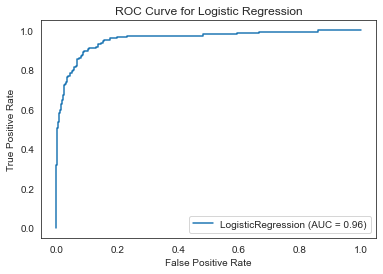

In [67]:
plot_roc_curve(x, test_x, test_y)
plt.title('ROC Curve for Logistic Regression')

Text(0.5, 1.0, 'Precision-Recall Curve for Logistic Regression')

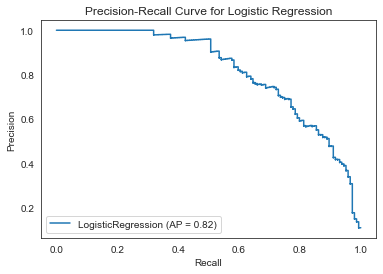

In [68]:
plot_precision_recall_curve(x, test_x, test_y)
plt.title('Precision-Recall Curve for Logistic Regression')

### 8. Build various other classification algorithms and compare their performance

### Random forest classification

In [69]:
a = RandomForestClassifier(n_estimators=100, max_depth=7,n_jobs=-1, random_state=1 )
a.fit(train_x, train_y)

RandomForestClassifier(max_depth=7, n_jobs=-1, random_state=1)

Training Accuracy: 99.37142857142857
Testing Accuracy: 98.66666666666667
Precision: 98.4375
Recall: 87.5


Text(0.5, 1.0, 'Precision-Recall Random Forest Classifier')

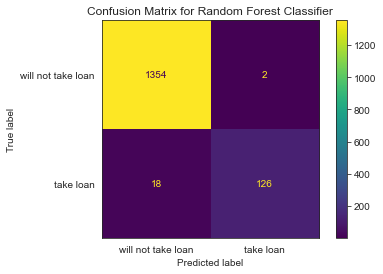

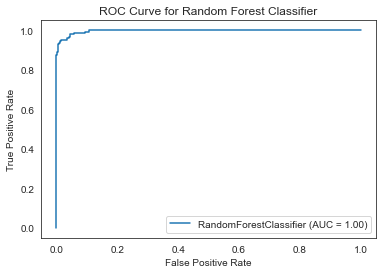

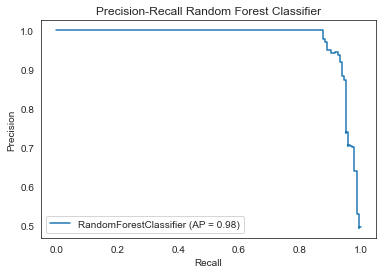

In [70]:
a_train_score =a.score(train_x, train_y)*100
a_test_score = a.score(test_x, test_y)*100
print('Training Accuracy:', a_train_score)
print('Testing Accuracy:', a_test_score)

y_pred_rf = a.predict(test_x)

precision_rf = precision_score(test_y, y_pred_rf, labels=class_name)
recall_rf = recall_score(test_y, y_pred_rf)
print('Precision:', precision_rf*100)
print('Recall:', recall_rf*100)

plot_confusion_matrix(a, test_x, test_y, display_labels=class_name)
plt.title('Confusion Matrix for Random Forest Classifier')

plot_roc_curve(a, test_x, test_y)
plt.title('ROC Curve for Random Forest Classifier')

plot_precision_recall_curve(a, test_x, test_y)
plt.title('Precision-Recall Random Forest Classifier')

### Decision tree classification

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
p = DecisionTreeClassifier()
p.fit(train_x, train_y)
y_pred=p.predict(test_x)

Training Accuracy: 100.0
Testing Accuracy: 98.33333333333333
Precision: 91.6083916083916
Recall: 90.97222222222221


Text(0.5, 1.0, 'Precision-Recall Decision Tree Classifier')

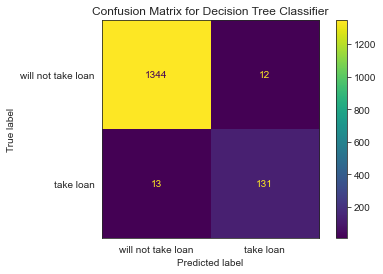

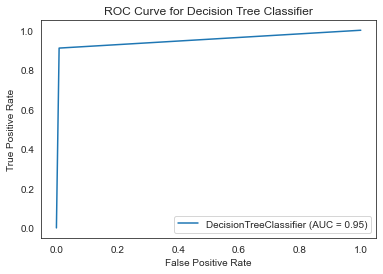

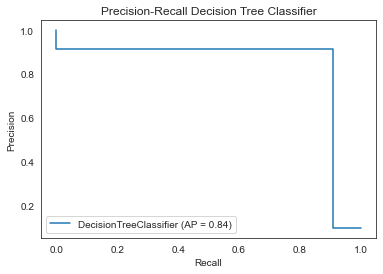

In [73]:
p_train_score =( p.score(train_x, train_y))*100
p_test_score =( p.score(test_x, test_y))*100
print('Training Accuracy:',p_train_score)
print('Testing Accuracy:',p_test_score)

precision_dt = precision_score(test_y, y_pred, labels=class_name)
recall_dt = recall_score(test_y, y_pred)
print('Precision:', precision_dt*100)
print('Recall:', recall_dt*100)

plot_confusion_matrix(p, test_x, test_y, display_labels=class_name)
plt.title('Confusion Matrix for Decision Tree Classifier')

plot_roc_curve(p, test_x, test_y)
plt.title('ROC Curve for Decision Tree Classifier')

plot_precision_recall_curve(p, test_x, test_y)
plt.title('Precision-Recall Decision Tree Classifier')

### Karnott Nearest Neighbour

In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
k= KNeighborsClassifier(n_neighbors= 15,weights ='uniform',metric='euclidean')
k.fit(train_x,train_y)
y_pred=k.predict(test_x)

Training Accuracy: 92.77142857142857
Testing Accuracy: 92.06666666666666
Precision: 66.23376623376623
Recall: 35.41666666666667


Text(0.5, 1.0, 'Precision-Recall Decision Tree Classifier')

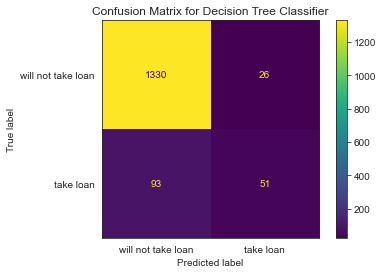

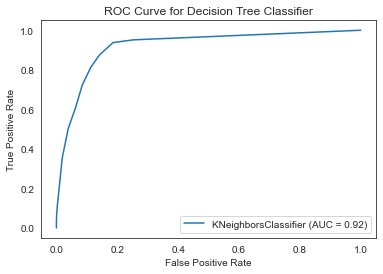

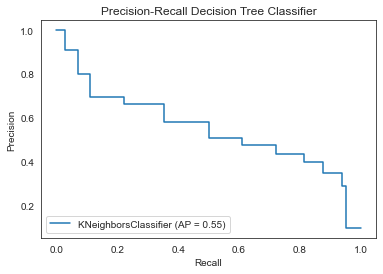

In [76]:
k_train_score = (k.score(train_x, train_y))*100

k_test_score = (k.score(test_x, test_y))*100
print('Training Accuracy:', k_train_score)
print('Testing Accuracy:', k_test_score)

precision_dt = precision_score(test_y, y_pred, labels=class_name)

recall_dt = recall_score(test_y, y_pred)
print('Precision:', precision_dt*100)
print('Recall:', recall_dt*100)

plot_confusion_matrix(k, test_x, test_y, display_labels=class_name)
plt.title('Confusion Matrix for Decision Tree Classifier')

plot_roc_curve(k, test_x, test_y)
plt.title('ROC Curve for Decision Tree Classifier')

plot_precision_recall_curve(k, test_x, test_y)
plt.title('Precision-Recall Decision Tree Classifier')

### 9. Give a business understanding of your model

In [77]:
###Model evaluation
models = pd.DataFrame({
    'Model':['Logistic Regression','Random Forest','KNeighborsClassifier','Decision Tree Classifier'],
    'Score':[x_train_score,a_train_score,p_train_score,k_train_score,],
    'Test Score':[x_test_score,a_test_score,p_test_score,k_test_score]})
models.sort_values(by='Test Score',ascending=False)

,Model,Score,Test Score
1,Random Forest,99.371429,98.666667
2,KNeighborsClassifier,100.000000,98.333333
0,Logistic Regression,95.228571,94.933333
3,Decision Tree Classifier,92.771429,92.066667
